In [17]:
%matplotlib inline

# Global libs
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as colormap
import pandas as pd
import numpy as np
import seaborn as sns

# Local libs
from utils.confusion_matrix import CM
from utils.cm_generator import CMGenerator
from metrics.tau import Tau
from metrics.tau_weighted import TauW

#### Generate a Subset of All Confusion Matrices

In [18]:
space_w = 30
gen = CMGenerator(n_p=3000, n_n=3000, n_cm=space_w)
gen.generate_cms()

In [19]:
all_tauw = []
for cm in gen.all_cms:
    tauw = TauW(cm, weights = np.array([1.0, 1.0, 1]))
    all_tauw.append(tauw.value)

tauw_mat = np.flip(np.array(all_tauw).reshape((space_w, space_w)), 0)

Text(0, 0.5, 'tpr')

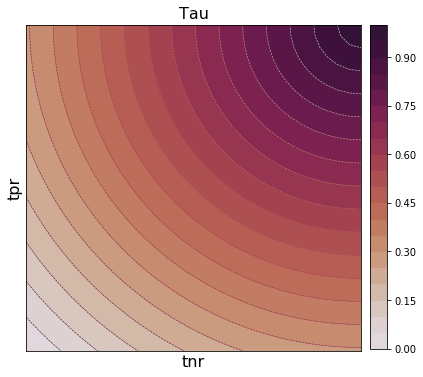

In [20]:
fig, ax = plt.subplots(figsize=(6,6))

x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)

X, Y = np.meshgrid(x, y)
cp = ax.contourf(X, Y, np.flipud(tauw_mat), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
cp2 = ax.contour(X, Y, np.flipud(tauw_mat), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')

cb_ax = fig.add_axes([0.92, 0.13, 0.04, 0.75])
fig.colorbar(cp, cax=cb_ax, orientation='vertical')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Tau', fontsize=16)
ax.set_xlabel('tnr', fontsize=16)
ax.set_ylabel('tpr', fontsize=16)


#### Changing the variable `b`

In [21]:
a_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
b_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
c_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

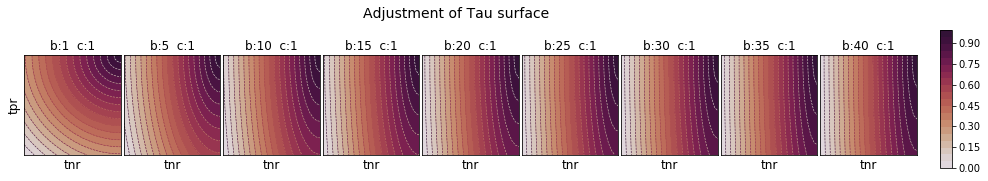

In [22]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)

#### A 3D View

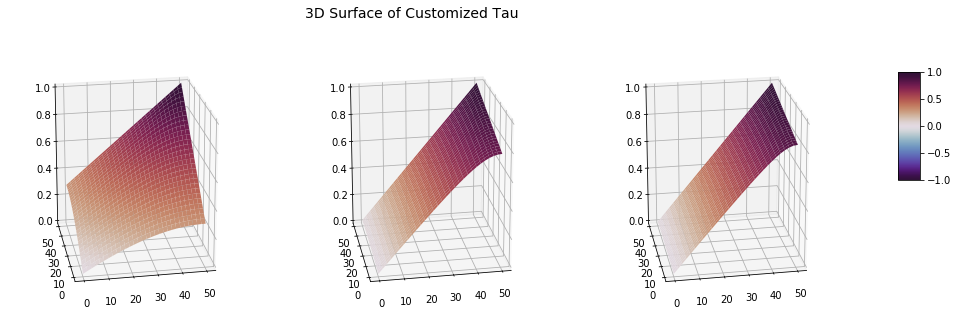

In [23]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)

#### Changing the variable `a`

In [24]:
a_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
b_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
c_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

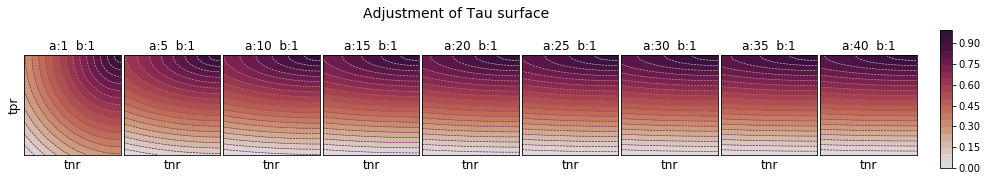

In [25]:
all_titles = ['a:{}  b:{}'.format(a, b) for a, b in zip(a_w, b_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    

cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8]) 
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.

#### A 3D View

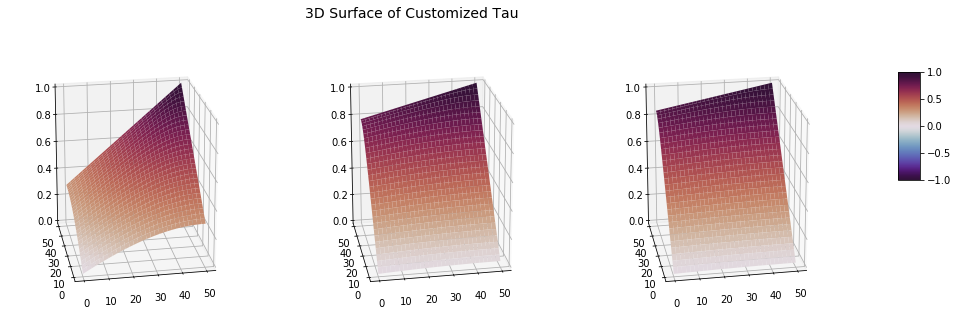

In [27]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)

#### Changing the variable `b` and `c`

In [28]:
a_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
b_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
c_w = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

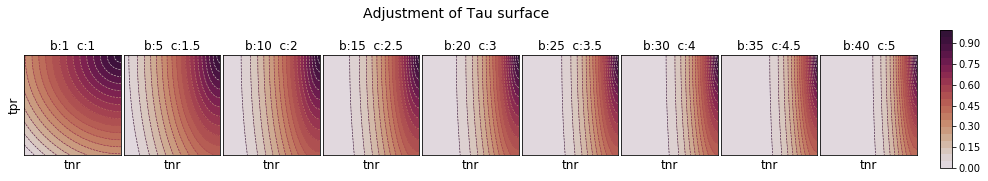

In [29]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)

#### A 3D View

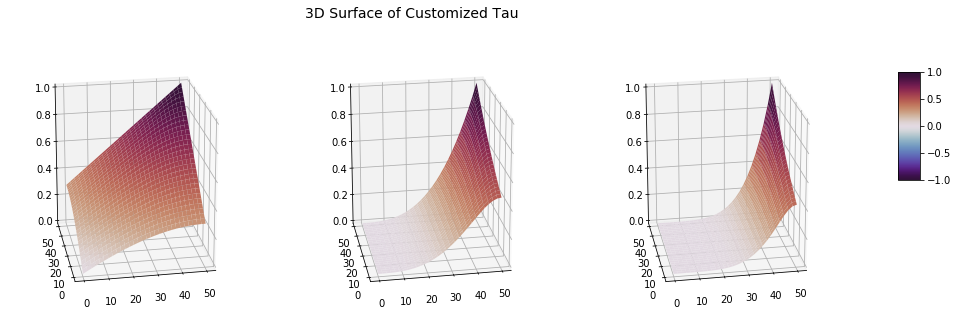

In [30]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)